<a href="https://colab.research.google.com/github/gabrielrmolina/Projeto_Awari/blob/main/Projeto_DS_Awari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Data Science - Awari**


In [ ]:
# Diretório que o dataset está no Google Drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Análise de Sentimentos usando Machine Learning**

* Criando modelos para análise de sentimentos de tweets com base em um dataset público.

In [ ]:
# Bibliotecas.

from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

**Ler arquivo de dados e conta a quantidade de linhas.**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Lives/Tweets_Mg.csv', encoding='utf-8')

In [ ]:
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Conta a quantidade de linhas de tweets neutros, positivos e negativos.**

In [ ]:
# O arquivo já possui uma classificação por tweet. A função abaixo está contando quantas classificações existem na base.

df.Classificacao.value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

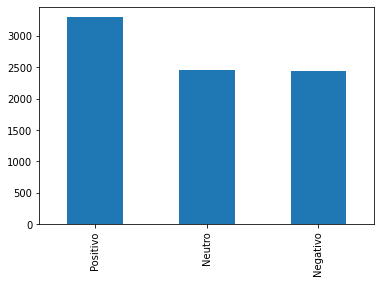

In [ ]:
%matplotlib inline
df.Classificacao.value_counts().plot(kind='bar')

In [ ]:
# Quantidade de linhas do dataset.

df.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

## Problemas da Base


* Existem linhas duplicadas na base;
* As linhas duplicadas são devido os retweets dos usuários.

In [ ]:
# Remover duplicatas
df.drop_duplicates(['Text'], inplace=True)

In [ ]:
# Quantidade de linhas depois de remover as duplicatas
df.Text.count()

5765

## **Separando tweets e suas Classes**

In [ ]:
tweets = df['Text']
classes = df['Classificacao']

**Instala bibliotecas e baixa a base de dados**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Funções de Pre-processamento de dados**

In [ ]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [ ]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmatization(instancia):
  palavras = []
  for w in instancia.split():
    palavras.append(wordnet_lemmatizer.lemmatize(w))
  return (" ".join(palavras))

**Aplica as 3 funções de Pre-processamento nos dados**

In [ ]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

**Visualize os dados e veja como ficou após o pré-processamento**

In [ ]:
tweets[:50]

['���⛪ @ catedr sant antôni govern valadares/mg',
 '� @ govern valadares, min geral',
 '�� @ govern valadares, min geral',
 '���',
 '��� psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²',
 '"daí gent visit govern valadares" "qu lug eh mãe?" "mg, gent um parent la" man ond q parent',
 '"é bonit bonita" #latergr #ibiturun #hom @ govern valadares, min geral',
 '"err desconhecido" mato! aliás, secret estad fazend tá assim mg precis dinh não, governador?',
 '"la la land cant estações" arras glob our est min',
 '"la la land cant estações" arras glob our est min',
 '"lo abusos, aun en el est má sólido, son min sord tard tempr estall

**Tokenização**
- Identifica emojis;
- Separa cada sentença de uma frase e agrupa em uma lista.

In [ ]:
from nltk.tokenize import word_tokenize


In [ ]:
frase = 'Este projeto está muito bom! :) :-) ;) =D'

In [ ]:

word_tokenize(frase)

['Este',
 'projeto',
 'está',
 'muito',
 'bom',
 '!',
 ':',
 ')',
 ':',
 '-',
 ')',
 ';',
 ')',
 '=D']

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet_tokenizer = TweetTokenizer()

In [ ]:
tweet_tokenizer.tokenize(frase)

['Este', 'projeto', 'está', 'muito', 'bom', '!', ':)', ':-)', ';)', '=D']

## Criando o modelo

**Instancia o objeto que faz a vetorização dos dados de texto**

In [ ]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)

# vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features=1000)   <-- bases muito grandes

**Aplica o vetorizador nos dados de texto**

In [ ]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

**Formato (Linhas, Colunas) da matriz**

In [ ]:
# 5765 linhas e 13361 colunas, pois cada palavra das frases se tornou uma coluna.

freq_tweets.shape

(5765, 6137)

**Treino do modelo de Machine Learning**

In [ ]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Matriz**

In [ ]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Testando o modelo com algumas instâncias simples**

In [ ]:
# defina instâncias de teste dentro de uma lista
testes = tweets

**Aplica a função de Pré-processamento nos dados**

In [ ]:
testes = [Preprocessing(i) for i in testes]

In [ ]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [ ]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

A saída de streaming foi truncada nas últimas 5000 linhas.
cust r$ 21,8 milhã calamidade, govern mg compr doi by #uolnotic via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #ary_antipt via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #ary_antipt via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #uolnotic via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #alemendes0110 via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #uol via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #uol via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #chico_pinh via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #heliovesp via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #chico_pinh via @c0nvey, Negativo
cust r$ 21,8 milhã calamidade, govern mg compr doi by #chico_pinh via @c0nvey

In [ ]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## **Tags de Negações**

* Acrescenta uma tag _NEG encontrada após um 'não'.
* Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
* Exemplos: 
    - Eu gosto de cachorros, positivo.
    - Eu **não** gosto de cachorros, negativo.

In [ ]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

## **Criando modelos com Pipelines**

* Pipelines são interessantes para reduzir código e automatizar fluxos

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

* Pipeline que atribui tag de negacoes nas palavras

In [ ]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [ ]:
pipeline_simples.fit(tweets,classes)

Pipeline(memory=None,
         steps=[('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pipeline_simples.steps

[('counts',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

* Gera o modelo de negações

In [ ]:
pipeline_negacoes.fit(tweets,classes)

Pipeline(memory=None,
         steps=[('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x7fd2417bd050>,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

* Etapas do pipeline

In [ ]:
pipeline_negacoes.steps

[('counts',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=<function <lambda> at 0x7fd2417bd050>,
                  vocabulary=None)),
 ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

Modelo com SVM

In [ ]:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

In [ ]:
pipeline_svm_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', svm.SVC(kernel='linear'))
])

## Validando os Modelos com Validação Cruzada

* Fazendo o cross validation do modelo

In [ ]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

* Medindo a acurácia média do modelo

In [ ]:
metrics.accuracy_score(classes,resultados)

0.8631396357328708

* Medidas de validação do modelo

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.86      0.91      2840
    Negativo       0.77      0.90      0.83       951
      Neutro       0.80      0.85      0.82      1974

    accuracy                           0.86      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.86      0.87      5765



* Matriz de confusão

In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       852      91         8   951
Neutro         196    1674       104  1974
Positivo        64     326      2450  2840
All           1112    2091      2562  5765


In [ ]:
def Metricas(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

In [ ]:
# naive bayes simples
Metricas(pipeline_simples,tweets,classes)

'Acurácia do modelo: 0.8631396357328708'

In [ ]:
# naive bayes com tag de negacoes
Metricas(pipeline_negacoes,tweets,classes)

'Acurácia do modelo: 0.6993928881179532'

In [ ]:
# svm linear simples
Metricas(pipeline_svm_simples,tweets,classes)

'Acurácia do modelo: 0.8811795316565482'

In [ ]:
# svm linear com tag de negacoes
Metricas(pipeline_svm_negacoes,tweets,classes)

'Acurácia do modelo: 0.7330442324371206'

## **Modelo com a Tag de Negações**

In [ ]:
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

* Medindo a acurácia média do modelo

In [ ]:
metrics.accuracy_score(classes,resultados)

0.6993928881179532

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.72      0.83      0.77      2840
    Negativo       0.66      0.53      0.59       951
      Neutro       0.69      0.59      0.64      1974

    accuracy                           0.70      5765
   macro avg       0.69      0.65      0.66      5765
weighted avg       0.70      0.70      0.69      5765



* Matriz de confusão

In [ ]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       502     170       279   951
Neutro         149    1169       656  1974
Positivo       113     366      2361  2840
All            764    1705      3296  5765


## **Avaliando modelo com Bigrams**

In [ ]:
# Bigrams
# Modelo introdutório

vectorizer = CountVectorizer(ngram_range=(2,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [ ]:
metrics.accuracy_score(classes,resultados)

0.8225498699045967

In [ ]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.95      0.83      0.88      2840
    Negativo       0.55      0.95      0.69       951
      Neutro       0.91      0.75      0.82      1974

    accuracy                           0.82      5765
   macro avg       0.80      0.84      0.80      5765
weighted avg       0.87      0.82      0.83      5765



## **Considerações Finais**

* Considere aumentar a quantidade de dados de treino.

* Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.

* Considere alterar os parâmetros do algoritmo.